In [1]:
from GitAnalyzer import analyze_repository

repoPath = 'https://github.com/IntegerMan/GitVisualizer'

combinations, fileModifications = analyze_repository(repoPath)
combinations

[{'hash': 'a85288e6deee374264b13d3143c886962e90550d',
  'paths': ['.gitignore', 'README.md']},
 {'hash': 'c58bad1219a1cf9b9b1105791fffc331a6d902fe',
  'paths': ['.gitignore', 'Experimentation.ipynb']},
 {'hash': '93847fdd7442be01b96103dfb281eb1ae64ece45',
  'paths': ['Experimentation.ipynb']},
 {'hash': '5046140600e8c4b698956f25353f092e5fc8aafc',
  'paths': ['Experimentation.ipynb']},
 {'hash': '2034c4255e4f0c63befa51f905be0053c010898b',
  'paths': ['Experimentation.ipynb']},
 {'hash': '3d702f368eaf0df616df8fea3af88c03dc367f49',
  'paths': ['Experimentation.ipynb', 'GitAnalyzer.py']},
 {'hash': '4b60a127992e35478bb2e0abf42fa9a9cabe994a',
  'paths': ['Experimentation.ipynb', 'RelationshipAnalyzer.py']},
 {'hash': '72dc5dca3ac6ed6486d74ba02b6b311135e4dd1b',
  'paths': ['Experimentation.ipynb',
   'GitAnalyzer.py',
   'RelationshipAnalyzer.py']},
 {'hash': '1d6c3c8ef62466f677198e3d7944c4631cf4745c',
  'paths': ['Experimentation.ipynb']},
 {'hash': '20c3e6b8a5f9110dd7c000517fe1866e2129069a

In [2]:
import pandas as pd

df = pd.DataFrame(fileModifications)
df['# Commits'] = 1 # used for summing in grouped mode
df.head()

,path,commit,author,lines_added,lines_deleted,# Commits
0,.gitignore,a85288e6deee374264b13d3143c886962e90550d,Matt Eland,0,0,1
1,README.md,a85288e6deee374264b13d3143c886962e90550d,Matt Eland,1,0,1
2,.gitignore,c58bad1219a1cf9b9b1105791fffc331a6d902fe,Matt Eland,139,0,1
3,Experimentation.ipynb,c58bad1219a1cf9b9b1105791fffc331a6d902fe,Matt Eland,36,0,1
4,Experimentation.ipynb,93847fdd7442be01b96103dfb281eb1ae64ece45,Matt Eland,56,2,1


In [3]:
from RelationshipAnalyzer import get_relationship_count

for path in df.groupby(by=['path']).sum().index:
    df['rel_' + path] = df['commit'].apply(lambda commit_hash: get_relationship_count(commit_hash, path, combinations))

df

,path,commit,author,lines_added,lines_deleted,# Commits,rel_.gitignore,rel_Experimentation.ipynb,rel_GitAnalyzer.py,rel_README.md,rel_RelationshipAnalyzer.py,rel_license
0,.gitignore,a85288e6deee374264b13d3143c886962e90550d,Matt Eland,0,0,1,1,0,0,1,0,0
1,README.md,a85288e6deee374264b13d3143c886962e90550d,Matt Eland,1,0,1,1,0,0,1,0,0
2,.gitignore,c58bad1219a1cf9b9b1105791fffc331a6d902fe,Matt Eland,139,0,1,1,1,0,0,0,0
3,Experimentation.ipynb,c58bad1219a1cf9b9b1105791fffc331a6d902fe,Matt Eland,36,0,1,1,1,0,0,0,0
4,Experimentation.ipynb,93847fdd7442be01b96103dfb281eb1ae64ece45,Matt Eland,56,2,1,0,1,0,0,0,0
5,Experimentation.ipynb,5046140600e8c4b698956f25353f092e5fc8aafc,Matt Eland,75,9,1,0,1,0,0,0,0
6,Experimentation.ipynb,2034c4255e4f0c63befa51f905be0053c010898b,Matt Eland,65,18,1,0,1,0,0,0,0
7,Experimentation.ipynb,3d702f368eaf0df616df8fea3af88c03dc367f49,Matt Eland,24,67,1,0,1,1,0,0,0
8,GitAnalyzer.py,3d702f368eaf0df616df8fea3af88c03dc367f49,Matt Eland,21,0,1,0,1,1,0,0,0
9,Experimentation.ipynb,4b60a127992e35478bb2e0abf42fa9a9cabe994a,Matt Eland,76,12,1,0,1,0,0,1,0


In [4]:
grouped = df.groupby(by=['path']).sum()
grouped = grouped.sort_index()
grouped

,lines_added,lines_deleted,# Commits,rel_.gitignore,rel_Experimentation.ipynb,rel_GitAnalyzer.py,rel_README.md,rel_RelationshipAnalyzer.py,rel_license
path,,,,,,,,,
.gitignore,139,0,2,2,1,0,1,0,0
Experimentation.ipynb,542,351,12,1,12,2,1,5,1
GitAnalyzer.py,36,7,2,0,2,2,0,1,0
README.md,8,1,2,1,1,0,2,0,1
RelationshipAnalyzer.py,100,4,5,0,5,1,0,5,0
license,339,0,1,0,1,0,1,0,1


In [5]:
from RelationshipAnalyzer import build_edge_tuples

edges = build_edge_tuples(grouped)
edges

[('.gitignore', 'Experimentation.ipynb', 1),
 ('.gitignore', 'README.md', 1),
 ('Experimentation.ipynb', 'GitAnalyzer.py', 2),
 ('Experimentation.ipynb', 'README.md', 1),
 ('Experimentation.ipynb', 'RelationshipAnalyzer.py', 5),
 ('Experimentation.ipynb', 'license', 1),
 ('GitAnalyzer.py', 'RelationshipAnalyzer.py', 1),
 ('README.md', 'license', 1)]

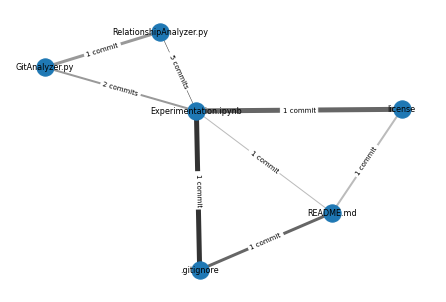

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from(grouped.index)
G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)

nx.draw(G,
        with_labels=True,
        cmap=plt.cm.Set1,
        pos=pos,
        font_size=8,
        edge_color=['#333333','#666666','#999999','#bbbbbb'],
        width=[5,3,2,1,0.5])

edge_labels = {}
for pathFrom, pathTo, weight in edges:
    if weight == 1:
        edge_labels[(pathFrom, pathTo)] = '1 commit'
    else:
        edge_labels[(pathFrom, pathTo)] = str(weight) + ' commits'

nx.draw_networkx_edge_labels(
   G, pos,
    edge_labels, label_pos=0.5, font_size=7
)
pass